# Analyze whole-brain activity

Loaded 4 trials.
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_30min_LHL_27mMhistinj_1pt75pctISO_1/mask_processed_Zyla_30min_LHL_27mMhistinj_1pt75pctISO_1.npy
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-03-06/Zyla_30min_RHL_27mMhistinj_1pt25pctISO_1/mask_processed_Zyla_30min_RHL_27mMhistinj_1pt25pctISO_1.npy
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_30min_RHL_50uL27MMHistinj_wpushbutton_1/mask_processed_Zyla_30min_RHL_50uL27MMHistinj_wpushbutton_1.npy
Loading mask file from: /Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/2024-02-29/Zyla_30min_LHL_50uL27MMHistinj_withpushbutton_1/mask_processed_Zyla_30min_LHL_50uL27MMHistinj_withpushbutton_1.npy
Loaded 4 masks.
Loaded 4 traces.
Loaded 4 sync infos.


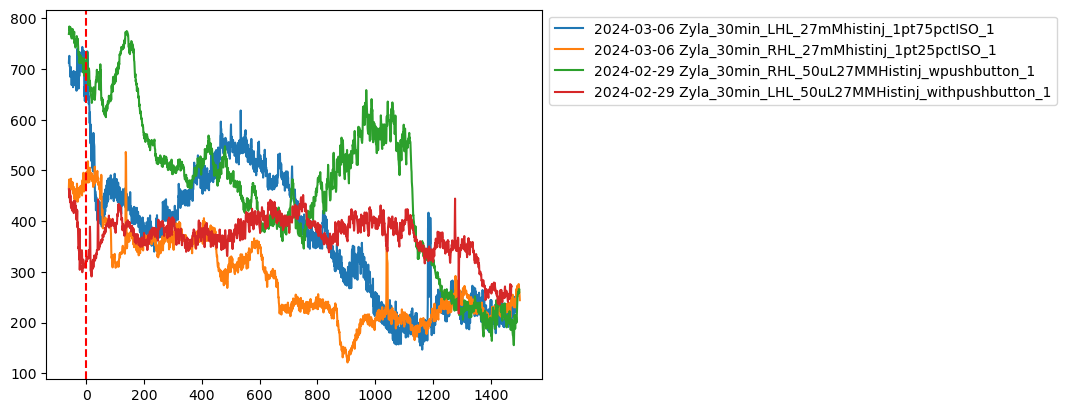

In [30]:
from neuroprocessing.imagingtrials import ImagingTrials
import matplotlib.pyplot as plt
import numpy as np
params = {
        "downsample_factor": 8,
        "aligner_target_num_features": 700,
        "secs_before_stim": 60, # only process frames starting at X seconds before stimulus
        "preprocess_prefix": "aligned_downsampled_",
        "process_prefix": 'processed_',
        "s3fs_toplvl_path": "/Users/ilya_arcadia/arcadia-neuroimaging-pruritogens/Videos",
        "local_toplvl_path": "/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections/",
        "load_from_s3": False,
        "save_to_s3": False,
        'crop_px' : 20,
        'bottom_percentile' : 5
        }

trials = ImagingTrials(params)
exp_dates, trial_names = trials.filter_exp_and_trial_dirs(# exp_dir="2024-02-29", 
                                                          limb = ".*HL",
                                                          injection_type=".*istinj*")
masks = trials.load_mask_files()
traces = trials.load_traces()
sync_infos = trials.get_sync_infos()
# Plot the traces

fig, ax = plt.subplots()
for trace, exp_date, trial_name, sync in zip(traces, exp_dates, trial_names, sync_infos):
    #  - sync['stim_onset_frame'] / params['downsample_factor']
    t = (np.arange(0, len(trace))) / (sync['framerate_hz'] / params['downsample_factor']) - params['secs_before_stim']
    ax.plot(t, trace, label=exp_date + ' ' + trial_name)
# legend to the right of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.axvline(x=0, color='r', linestyle='--')

# plot masks
# fig, axs = plt.subplots(ncols=len(masks))
# for ax, mask, exp_date, trial_name in zip(axs, masks, exp_dates, trial_names):
#     ax.imshow(mask, cmap='gray')


In [1]:
import os

def collect_dates_and_exps(root_dir):
    dates = []
    exps = []
    
    # List directories at the first level (dates)
    date_dirs = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    
    for date in date_dirs:
        # Path to the date directory
        date_dir_path = os.path.join(root_dir, date)
        
        # List directories at the second level (exps)
        exp_dirs = [d for d in os.listdir(date_dir_path) if os.path.isdir(os.path.join(date_dir_path, d))]
        
        # Append date and exp information
        for exp in exp_dirs:
            dates.append(date)
            exps.append(exp)
    
    return dates, exps

# Example usage

root_directory = '/Users/ilya_arcadia/Neuroimaging_local/Processed/Injections'
dates, exps = collect_dates_and_exps(root_directory)
print(dates)
print(exps)


['2024-03-06', '2024-03-06', '2024-03-06', '2024-03-06', '2024-02-29_old', '2024-02-29_old', '2024-02-29_old', '2024-02-29_old', '2024-02-29_old', '2024-02-29_old', '2024-02-29', '2024-02-29', '2024-02-29', '2024-02-29', '2024-02-29']
['Zyla_15min_LHL_salineinj_1pt75pctISO_1', 'Zyla_30min_LHL_27mMhistinj_1pt75pctISO_1', 'Zyla_30min_RHL_27mMhistinj_1pt25pctISO_1', 'Zyla_15min_RHL_salineinj_1pt25pctISO_1', 'LHL_hist', 'LHL_saline', 'RHL_saline', 'nape_saline', 'nape_hist', 'RHL_hist', 'Zyla_15min_RHL_salineinj_wpushbutton_1', 'Zyla_30min_RHL_50uL27MMHistinj_wpushbutton_1', 'Zyla_30min_LHL_50uL27MMHistinj_withpushbutton_1', 'Zyla_15min_LHL_salineinj_withpushbutton_1', 'Zyla_30min_nape_50uL27MMHistinj_wpushbutton_1']


In [3]:
len(exps)

15